In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys

import numpy as np
import pandas as pd
import csv

RDKit WARNING: [13:15:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
with open('chembl_dopamin_d2_rp_ki.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligands = [Chem.MolFromSmiles(m["Smiles"]) for m in reader]

supplier = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supplier if m!=None]

print(len(ligands))
print(len(drugbank))

RDKit ERROR: [13:15:10] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:15:10] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [13:15:10] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [13:15:10] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [13:15:10] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:15:11] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:15:11] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [13:15:11] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:15:11] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [13:15:11] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [13:15:11] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [13:15:11] Can't kek

10473
7113


RDKit ERROR: [13:15:12] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [13:15:13] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [13:15:13] ERROR: Could not sanitize molecule ending on line 1151592


Jako vlastní strukturní klíče jsem zvolila typické [antipsychotika](https://en.wikipedia.org/wiki/Antipsychotic) prvního druhu - což jsou látky blokující dopaminový receptor (proto si myslím, že bych v datasetu měla nějaké mít - mám dataset inhibitorů). Ale použití takového klíče mi přijde velmi umělé.

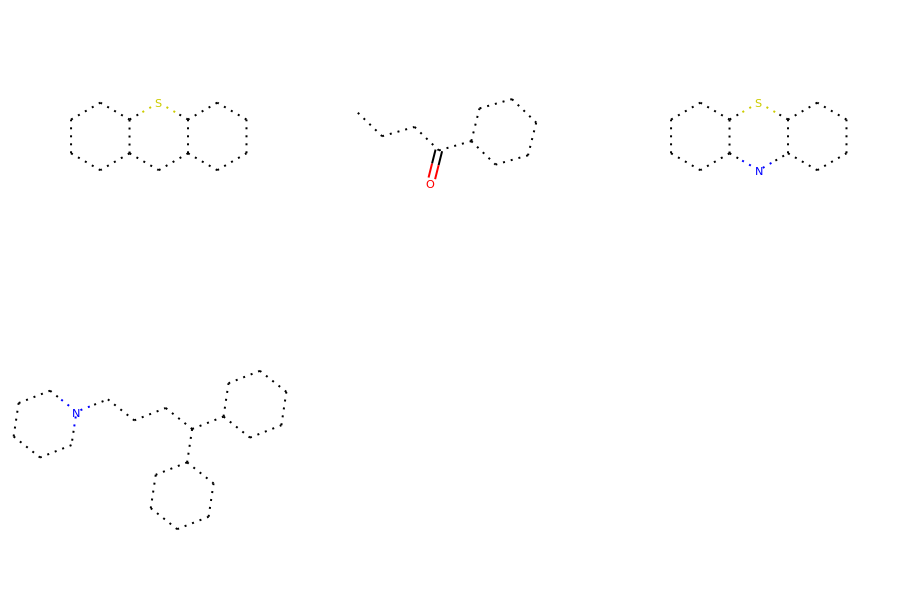

In [3]:
thioxanthene = Chem.MolFromSmarts("c1ccc2c(c1)Cc1ccccc1S2")
butyrophenone = Chem.MolFromSmarts("CCCC(=O)c1ccccc1")
phenothiazine = Chem.MolFromSmarts("c1ccc2c(c1)Nc1ccccc1S2")
diphenzlbutzlpiperidines = Chem.MolFromSmarts("C4CCN(CCCC(c2ccccc2)c3ccccc3)CC4")#Chem.MolFromSmarts("c1=c-c=c-c=c1-C(c1=c-c=c-c=c1)-C-C-C-n1-c-c-c-c-c1")
is_first_type =  [thioxanthene, butyrophenone, phenothiazine, diphenzlbutzlpiperidines]#
Draw.MolsToGridImage(is_first_type, molsPerRow=3, subImgSize=(300,300))
#diphenzlbutzlpiperidines

In [4]:
ligand_keys = []
overview = [0, 0, 0, 0]
#{"thioxanthene": 0, "butyrophenone": 0, "phenothiazine":0, "diphenzlbutzlpiperidines":0}
for l in ligands:
    key = []
    for i, t in enumerate(is_first_type):
        #print(i)
        if l.HasSubstructMatch(t):
            key.append(1)
            x = overview[i]
            overview[i] = x +1
        else:
            key.append(0)
    ligand_keys.append(key)
print(overview)
len(ligand_keys)

[2, 390, 35, 5]


10473

Trochu mě zaskočilo, jak málo látek má některou z těchto substruktur. Bohužel nevím, proč tomu tak je, jestli látky nejsou v CHEMBLu (nemají naměřené K<sub>i</sub> na tento cíl, což mi přijde trochu divné, měla by to být normální léčiva) nebo wikipedie není dobrý zdroj nebo mám špatnou představu o tom, co vlastně jsou moje ligandy... 

In [6]:
d2_keys = [MACCSkeys.GenMACCSKeys(l) for l in ligands]
db_keys = [MACCSkeys.GenMACCSKeys(d) for d in drugbank]
len(d2_keys), len(db_keys)

(10473, 7113)

In [7]:
np.set_printoptions(suppress=True)
d2_keys_sum = np.zeros(len(d2_keys[0]))
for l in d2_keys:
    for i,b in enumerate(l.ToBitString()):
        if int(b)==1:
            d2_keys_sum[i]+=1
d2_keys_sum

array([    0.,     0.,     0.,     6.,     0.,     0.,     0.,     0.,
          39.,     0.,     1.,   130.,     1.,    15.,    16.,     1.,
           6.,   208.,     1.,  1277.,    25.,     4.,   392.,   143.,
         174.,   286.,    89.,   110.,   295.,    11.,    46.,     9.,
         766.,   779.,   140.,     4.,  1018.,   593.,  1963.,    97.,
         157.,   352.,  2226.,   257.,    12.,    40.,   286.,  1007.,
         107.,   181.,   453.,  1032.,  1687.,   405.,   854.,   986.,
          72.,  2238.,   994.,  1669.,   986.,  1053.,  6838.,    77.,
        1565.,  4732.,  1417.,  1158.,    10.,   769.,   381.,   439.,
        1616.,  1009.,   918.,  8593.,   503.,  3254.,   586.,  6118.,
        3824.,  2468.,  2802.,  5861.,   649.,  9301.,  9275.,  3845.,
        2650.,  1297.,  4436.,  4607.,  4034.,  4283.,  2706.,  3644.,
        6103.,  3637.,  8065.,   935.,  9803.,  6876.,  1420.,  2718.,
        4333.,  7321.,  2731.,  4460.,  2907.,  2438.,  4782.,  9682.,
      

In [8]:
db_keys_sum = np.zeros(len(db_keys[0]))
for l in db_keys:
    for i,b in enumerate(l.ToBitString()):
        if int(b)==1:
            db_keys_sum[i]+=1
db_keys_sum

array([   0.,    0.,    0.,   30.,    0.,    1.,   11.,   24.,   99.,
         46.,   22.,  117.,   30.,   60.,   33.,   11.,   52.,   77.,
         68.,  282.,    7.,   21.,  181.,  212.,  435.,  564.,  224.,
         96.,  149.,  726.,  126.,   21.,  431.,  481.,  153.,   44.,
        625.,  521., 1312.,  153.,  167.,  166.,  698., 1198.,  266.,
        246.,  194.,  455.,  869.,  713.,  646.,  601.,  553., 1895.,
       2246.,  663.,  178., 1633.,  669.,  604.,  685.,  695., 1753.,
        207.,  624., 2507., 1118.,  782.,  133., 1551.,  295.,  526.,
       2196.,  755., 1184., 2092.,  797., 2245.,  703., 2263., 2296.,
       1228., 2080., 2781., 2109., 2498., 1685., 1310., 1596., 2474.,
       3533., 3342., 2825., 1650., 1481., 3191., 3098., 2783., 3056.,
       1145., 2845., 2775., 1934.,  786., 3210., 2939., 2665., 1534.,
       1732., 2372., 3113., 3377., 2725., 2292., 1097., 1828., 1896.,
       3354., 3347.,  924., 3223., 3762., 2973., 2791., 2463., 3448.,
       2547., 3821.,

In [9]:
db_keys_proportions = np.divide(db_keys_sum,len(drugbank))
db_keys_proportions

array([0.        , 0.        , 0.        , 0.00421763, 0.        ,
       0.00014059, 0.00154646, 0.0033741 , 0.01391818, 0.00646703,
       0.00309293, 0.01644876, 0.00421763, 0.00843526, 0.00463939,
       0.00154646, 0.00731056, 0.01082525, 0.00955996, 0.03964572,
       0.00098411, 0.00295234, 0.02544637, 0.02980458, 0.06115563,
       0.07929144, 0.03149164, 0.01349642, 0.02094756, 0.10206664,
       0.01771404, 0.00295234, 0.06059328, 0.06762266, 0.02150991,
       0.00618586, 0.08786729, 0.07324617, 0.18445101, 0.02150991,
       0.02347814, 0.02333755, 0.09813018, 0.16842401, 0.03739632,
       0.03458456, 0.02727401, 0.06396738, 0.12217067, 0.100239  ,
       0.09081963, 0.08449318, 0.07774497, 0.26641361, 0.31575988,
       0.09320962, 0.0250246 , 0.22957964, 0.09405314, 0.08491494,
       0.09630254, 0.09770842, 0.24645016, 0.02910164, 0.0877267 ,
       0.35245325, 0.157177  , 0.10993955, 0.01869816, 0.21805146,
       0.04147336, 0.07394911, 0.30873049, 0.10614368, 0.16645

In [10]:
d2_keys_proportions = np.divide(d2_keys_sum, len(ligands))

In [11]:
#ligands-drugbank
diff_keys = np.subtract(d2_keys_proportions, db_keys_proportions)
diff_keys

array([ 0.        ,  0.        ,  0.        , -0.00364473,  0.        ,
       -0.00014059, -0.00154646, -0.0033741 , -0.01019432, -0.00646703,
       -0.00299744, -0.00403588, -0.00412215, -0.00700301, -0.00311165,
       -0.00145098, -0.00673766,  0.00903534, -0.00946448,  0.08228687,
        0.00140298, -0.00257041,  0.01198322, -0.01615042, -0.04454148,
       -0.05198312, -0.02299359, -0.00299322,  0.00722011, -0.10101632,
       -0.0133218 , -0.00209299,  0.01254718,  0.00675908, -0.0081422 ,
       -0.00580392,  0.00933504, -0.01662438,  0.00298335, -0.012248  ,
       -0.00848721,  0.01027268,  0.11441636, -0.14388472, -0.03625051,
       -0.03076522,  0.00003431,  0.03218463, -0.11195393, -0.08295646,
       -0.04756554,  0.01404592,  0.0833359 , -0.22774274, -0.23421686,
        0.00093724, -0.01814978, -0.01588729,  0.00085758,  0.07444722,
       -0.00215569,  0.00283584,  0.40646686, -0.02174941,  0.06170517,
        0.09937526, -0.0218767 ,  0.00063049, -0.01774332, -0.14

In [12]:
diff_keys_sorted = dict(enumerate(diff_keys))
diff_keys_sorted

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: -0.003644727944762703,
 4: 0.0,
 5: -0.00014058765640376775,
 6: -0.0015464642204414453,
 7: -0.003374103753690426,
 8: -0.010194316626195866,
 9: -0.006467032194573317,
 10: -0.002997444816324502,
 11: -0.004035884606650355,
 12: -0.004122146067554644,
 13: -0.007003005015850241,
 14: -0.003111654668390124,
 15: -0.001450980595883057,
 16: -0.0067376563856455934,
 17: 0.009035344365054637,
 18: -0.00946447701089782,
 19: 0.08228686945519928,
 20: 0.001402977019133332,
 21: -0.0025704062862455697,
 22: 0.011983215017806224,
 23: -0.016150424845749245,
 24: -0.044541479862479416,
 25: -0.05198312158802597,
 26: -0.02299359244874742,
 27: -0.002993216313338997,
 28: 0.007220108440563134,
 29: -0.10101631867899312,
 30: -0.013321797977188878,
 31: -0.0020929881634536287,
 32: 0.01254717650170148,
 33: 0.006759080800772144,
 34: -0.00814220399160211,
 35: -0.005803922383532228,
 36: 0.00933504454808437,
 37: -0.016624379623238768,
 38: 0.002983349806372826,
 

In [13]:
diff_keys_sorted = {k: v for k,v in sorted(diff_keys_sorted.items(), key=lambda x:x[1])}
diff_keys_sorted

{131: -0.43558417352680867,
 139: -0.3853680023863255,
 146: -0.34743039712932167,
 140: -0.32339212281441265,
 123: -0.28887590000162294,
 136: -0.25597540831532295,
 159: -0.25233700298930994,
 84: -0.2345304950171522,
 54: -0.23421686090999877,
 53: -0.22774274093899263,
 89: -0.22397160089069185,
 157: -0.16913810584732292,
 72: -0.1544289561763186,
 154: -0.14933534175143715,
 132: -0.14626363636839573,
 69: -0.14462454779684322,
 43: -0.14388472086020798,
 102: -0.13630978061197555,
 112: -0.1183252727998565,
 106: -0.11390032564708275,
 48: -0.11195392558712663,
 130: -0.10703931778863149,
 29: -0.10101631867899312,
 109: -0.10068484431638658,
 95: -0.10067288369365618,
 49: -0.08295646297081813,
 74: -0.07880181783746062,
 90: -0.0731308315335012,
 99: -0.07169567762022108,
 164: -0.07121133280682435,
 116: -0.06947599545303035,
 151: -0.06757896819936204,
 141: -0.06546838140919735,
 119: -0.0649741298173774,
 76: -0.06402009900093361,
 124: -0.05418299019837031,
 25: -0.05198

5 nejvíce se vyskytujících v ligandech d2 oproti drugbank:
- 86 bit - CH2QCH2 - !#6 => ne-uhlík  - cokoliv kromě uhlíku
- 85 bit - CN(C)C
- 100 bit - ACH2N
- 128 bit - ACH2AAACH2A  - vypadá to jako delší řetězec
- 75 bit - A!N\\$A - cokoliv (ne v kruhu), dusík ,(v kruhu) cokoliv 

Celkově mi přijde, že tu převažují větší struktury (ring i non-ring) s heteroatomy, což neodporuje výsledkům třetího cvičení.

5 nejvíce se vyskytujících v drugbank strukturách oproti ligandům d2:
- 131 bit -  QH > 1
- 139 bit - OH - polární skupina, d2 ligandy jsou více lipofilní než drugbankové struktury
- 146 bit - O > 2
- 140 bit - O > 3 
- 123 bit - OCO

Vypadá to, že v drugbank bude více struktur obsahujících kyslík (elektronegativní prvek) - často tvoří polární vazby. Drugbank podle cvičení tři obsahuje méně lipofilní látky než d2d dataset. 